# Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('Titanic_Dataset.csv')

In [3]:
data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.describe()
# here we can see the Statistical Information of the data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info()
# by using the .info() we able to see the data type , column name  and which column having missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.shape

# Totol 891 rows and 12 columns

(891, 12)

In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Data Preprocessing

### Finding The Missing Values

In [8]:

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# We can see Age and Cabin Column having the  null values
''' we can replace the age by using the Median'''

' we can replace the age by using the Median'

In [10]:
pr =((data['Age'].isnull().sum())/len(data['Age']))*100
print(pr)
# we have 19.89 % Missing values

19.865319865319865


In [11]:
data['Age'].fillna(data['Age'].median(),inplace=True)

C:\Users\akash\AppData\Local\Temp\ipykernel_1596\2124576783.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(),inplace=True)


In [12]:
data['Age'].isnull().sum()

0

In [13]:
# Now Cabin
# Lets first check the data type of Cabin
data['Cabin'].info()
# data type is object , then its can be filled by the Mode

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
204 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [14]:
# lets check the percentage of the missing value

pr1= ((data['Cabin'].isnull().sum())/len(data['Cabin']))*100
print(pr1)

# we have 77.10% Missing value then , we can not fill it. It can be bias.

77.10437710437711


In [15]:
#l we droping the Cabin Column from the data
data.drop(columns='Cabin',inplace=True)

In [16]:
# Embarked
data['Embarked'].isnull().sum()
# its little vaue

2

In [17]:
# check the data type and info
data['Embarked'].info()

''' Data type is objective .we can fil it by its mode
'''


<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
889 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


' Data type is objective .we can fil it by its mode\n'

In [18]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

C:\Users\akash\AppData\Local\Temp\ipykernel_1596\1523684883.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)


In [19]:
data['Embarked'].isnull().sum()


0

In [20]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Label Encoding
* Label Encoding is used for convert the Categorical data into Numerical data or formate.


In [21]:
# define function for encoding

def encode(df):
    for col in (df.select_dtypes(include=['object']).columns) :  
        df[col], _ = pd.factorize(df[col])  
    return df  
# it will work at once for all data type

In [22]:
# create list of which column having the Object data type
obj_t = data.select_dtypes(include=['object']).columns.tolist()

print(obj_t) 

['Name', 'Sex', 'Ticket', 'Embarked']


In [23]:
# now we apply encoding on actual dataframe
encoded_data = encode(data)


In [24]:
print(encoded_data.head())

   PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3     0    0  22.0      1      0       0   
1            2         1       1     1    1  38.0      1      0       1   
2            3         1       3     2    1  26.0      0      0       2   
3            4         1       1     3    1  35.0      1      0       3   
4            5         0       3     4    0  35.0      0      0       4   

      Fare  Embarked  
0   7.2500         0  
1  71.2833         1  
2   7.9250         0  
3  53.1000         0  
4   8.0500         0  


In [25]:
encoded_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,0,22.0,1,0,0,7.2500,0
1,2,1,1,1,1,38.0,1,0,1,71.2833,1
2,3,1,3,2,1,26.0,0,0,2,7.9250,0
3,4,1,1,3,1,35.0,1,0,3,53.1000,0
4,5,0,3,4,0,35.0,0,0,4,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,886,0,27.0,0,0,677,13.0000,0
887,888,1,1,887,1,19.0,0,0,678,30.0000,0
888,889,0,3,888,1,28.0,1,2,614,23.4500,0
889,890,1,1,889,0,26.0,0,0,679,30.0000,1


# Task 8
* pre processing
* quartile, tukeys method
* box  and whisker plot , Z score(outlier)
* standardization
* minmax scaler
* PCA


In [26]:
# Now calculate the Qurtiles for Age andd Fare

q1 = data['Age'].quantile(0.25)
print('Q1=',q1)
q3 =data['Age'].quantile(0.75)
print('Q3=',q3)

Q1= 22.0
Q3= 35.0


In [27]:
IQR = q3 - q1
print(IQR)

13.0


## lets define the Outlier using the Tukeys Method of Outlier Detection

In [28]:

ol = (data[['Age','Fare']] < (q1 -1.5*IQR)) |( data[['Age','Fare']]>(q3+1.5*IQR))


lower_bond=data[['Age','Fare']] < (q1 -1.5*IQR)

print(lower_bond.sum())

upper_bond=data[['Age','Fare']] > (q3 + 1.5*IQR)
print(upper_bond.sum())

Age     24
Fare    15
dtype: int64
Age      42
Fare    141
dtype: int64


In [29]:
overall_outliers=(ol.sum())
print(f'There is  {overall_outliers} Overall Outliers are present')

There is  Age      66
Fare    156
dtype: int64 Overall Outliers are present


## Box And Whisker Plots

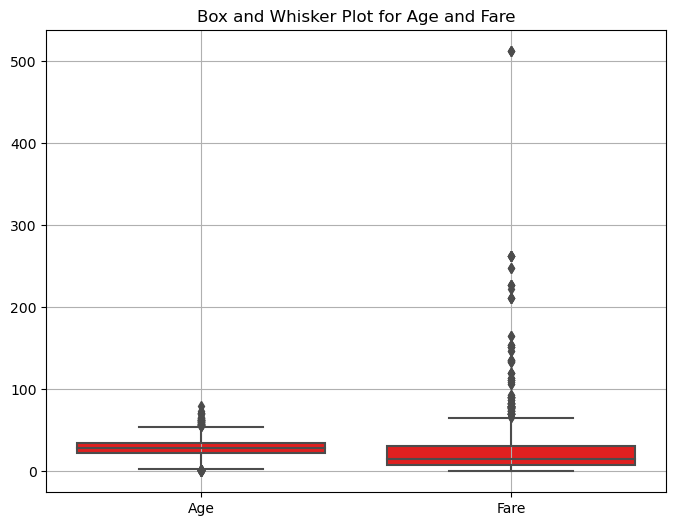

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for 'Age' and 'Fare'
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['Age', 'Fare']],color='red')
plt.title('Box and Whisker Plot for Age and Fare')
plt.grid(True)
plt.show()

## Z-Scores
* Z-score measures how many standard deviations a data point is from the mean. 

In [31]:
from scipy.stats import zscore

In [32]:
# Create the new column in the data set for the respective columns
data['Age_zs'] =zscore(data['Age'])
data['Fare_zs']=  zscore(data['Fare'])

In [33]:
# Finding Outliers
outl_zs =data[['Age_zs','Fare_zs']].abs() > 3

In [34]:
print(outl_zs.sum())

Age_zs      7
Fare_zs    20
dtype: int64


## Standardization
* Standardization transforms data to have a mean of 0 and a standard deviation of 1.

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
# Split the data 

scaler = StandardScaler()
data[['Age_std','Fare_std']]= scaler.fit_transform(data[['Age','Fare']])

In [37]:
data['Age_std']

0     -0.565736
1      0.663861
2     -0.258337
3      0.433312
4      0.433312
         ...   
886   -0.181487
887   -0.796286
888   -0.104637
889   -0.258337
890    0.202762
Name: Age_std, Length: 891, dtype: float64

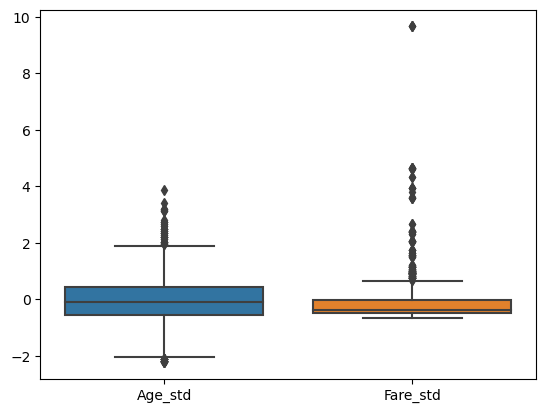

In [38]:
sns.boxplot(data=data[['Age_std','Fare_std']])
plt.show()

# Min Max Scalres

In [39]:
from sklearn.preprocessing import MinMaxScaler

minmax_slr = MinMaxScaler()

In [40]:
data['MinMax_slr_Age'] = minmax_slr.fit_transform(data[['Age']])
data['MinMax_slr_Fare']= minmax_slr.fit_transform(data[['Fare']])

In [41]:
print('n\MInmax Scler values')
print(data[['Age','MinMax_slr_Age','Fare','MinMax_slr_Fare']].head(10))

n\MInmax Scler values
    Age  MinMax_slr_Age     Fare  MinMax_slr_Fare
0  22.0        0.271174   7.2500         0.014151
1  38.0        0.472229  71.2833         0.139136
2  26.0        0.321438   7.9250         0.015469
3  35.0        0.434531  53.1000         0.103644
4  35.0        0.434531   8.0500         0.015713
5  28.0        0.346569   8.4583         0.016510
6  54.0        0.673285  51.8625         0.101229
7   2.0        0.019854  21.0750         0.041136
8  27.0        0.334004  11.1333         0.021731
9  14.0        0.170646  30.0708         0.058694


# Principal component Analysis (PCA)
* For Dimensinaly reduction of data

In [42]:
from sklearn.decomposition import PCA

In [43]:
# Creating  sample data
np.random.seed(42)

df = np.random.normal(0,1,(100,3)) # 100 samples and 3 varibles

In [44]:
df_pca = pd.DataFrame(df,columns=['A','B','C'])

In [45]:
# STD data before pca
scaler=StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

In [46]:
# now Apply pca
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

In [47]:
df_pca_re = pd.DataFrame(pca_result,columns=['P1','P2'])

In [48]:
df_pca_re.head(10)

,P1,P2
0,-0.145258,0.317572
1,0.974782,1.290087
2,1.654632,0.624893
3,0.480282,0.598526
4,0.465650,1.381800
5,-0.928357,0.019481
6,-2.098519,-0.005878
7,0.969266,-0.445595
8,0.628208,-0.757243
9,0.202755,0.549432
